## Hand Written Digit Prediction-Classification Analysis
The digit datset consists of 8×8 pixel imagges of digit . The images attributes of the dataset store 8×8 arrays of grayscales value foe each images we will use these arrays to visualize the first 4 images . The target attributes of the datset stores the digit each images represent

##Import Libarary




In [4]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

##Import Data


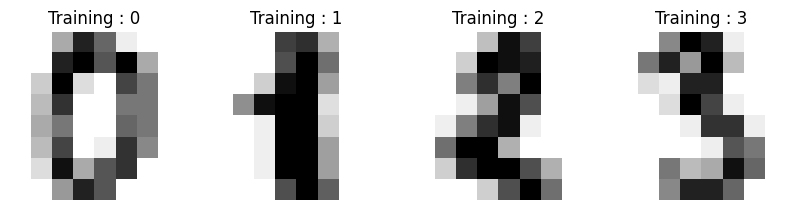

In [7]:
from sklearn.datasets import load_digits

df = load_digits()

_, axes = plt.subplots(nrows=1, ncols=4,  figsize=(10,3))
for ax, images , label in zip (axes,  df.images,  df. target):
  ax.set_axis_off()
  ax.imshow(images, cmap=plt.cm.gray_r,  interpolation="nearest")
  ax.set_title("Training : %i" % label)

##Data Preprocessing
Flatten Image

In [8]:
df.images.shape
(1797,8,8)


(1797, 8, 8)

In [9]:
df.images[0]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
df.images[0].shape
(8,8)

(8, 8)

In [11]:
len(df.images)
1797

1797

In [14]:
n_sample = len(df.images)
data = df.images.reshape((n_sample, -1))

In [15]:
data[0]



array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
data[0].shape

(64,)

In [17]:
data.shape

(1797, 64)

##Scaling Image Data


In [18]:
data.min()

0.0

data.max()

In [20]:
data = data/16

In [21]:
data.min()

0.0

In [22]:
data.max()

1.0

In [23]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

##Train Test Split Data

In [30]:
from sklearn.model_selection import train_test_split


In [36]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [37]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

##Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf= RandomForestClassifier()

In [40]:
rf.fit(x_train, y_train)

RandomForestClassifier()

##Predict Test Data


In [41]:
y_pred = rf.predict(x_test)

In [42]:
y_pred

array([2, 5, 2, 2, 0, 1, 1, 3, 0, 1, 4, 3, 6, 5, 0, 6, 3, 7, 7, 0, 5, 2,
       8, 3, 8, 0, 5, 7, 0, 6, 1, 2, 6, 4, 6, 8, 3, 9, 5, 7, 2, 4, 1, 8,
       5, 2, 2, 7, 5, 4, 7, 9, 6, 6, 2, 7, 8, 5, 3, 6, 1, 1, 4, 1, 9, 5,
       7, 9, 0, 6, 6, 0, 7, 5, 0, 1, 3, 9, 5, 1, 4, 9, 6, 5, 6, 8, 7, 5,
       3, 3, 8, 5, 0, 5, 7, 5, 7, 4, 7, 3, 8, 9, 4, 3, 1, 1, 6, 1, 7, 5,
       5, 5, 8, 4, 9, 4, 1, 1, 3, 2, 7, 2, 1, 4, 0, 6, 4, 1, 9, 7, 8, 3,
       3, 9, 8, 0, 3, 7, 2, 5, 9, 4, 5, 1, 1, 6, 6, 6, 4, 5, 6, 9, 8, 1,
       4, 8, 8, 9, 0, 4, 5, 1, 8, 2, 8, 8, 9, 1, 2, 6, 1, 6, 3, 7, 2, 8,
       6, 8, 7, 7, 9, 6, 3, 8, 4, 0, 8, 4, 3, 1, 4, 4, 6, 8, 8, 9, 6, 0,
       3, 2, 1, 5, 2, 1, 3, 7, 8, 2, 6, 0, 7, 4, 3, 4, 7, 2, 8, 7, 7, 6,
       5, 9, 2, 9, 6, 1, 1, 5, 6, 7, 5, 3, 4, 1, 1, 2, 8, 0, 9, 7, 9, 3,
       2, 1, 2, 6, 7, 2, 9, 3, 3, 0, 2, 6, 6, 1, 3, 5, 1, 0, 7, 4, 4, 2,
       1, 5, 8, 5, 0, 4, 8, 3, 2, 5, 9, 8, 2, 6, 4, 4, 1, 2, 5, 7, 2, 5,
       3, 5, 3, 4, 6, 3, 2, 3, 1, 7, 9, 9, 2, 1, 3,

##Model accuracy

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
confusion_matrix(y_test,y_pred)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 65,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 58,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 57,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 56,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 50,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 54]])

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.98        65
           2       1.00      1.00      1.00        58
           3       0.97      1.00      0.98        57
           4       0.98      1.00      0.99        50
           5       0.98      1.00      0.99        56
           6       1.00      0.98      0.99        46
           7       1.00      1.00      1.00        54
           8       0.96      0.94      0.95        53
           9       1.00      0.93      0.96        58

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

